

1. Upload the CSV file named "MP2_Data.csv"



In [1]:
from google.colab import files
uploaded = files.upload()

Saving MP2_Data.csv to MP2_Data.csv


In [4]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
# Import uploaded dataset
df = pd.read_csv(io.BytesIO(uploaded['MP2_Data.csv']))
SEED=42

In [ ]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
df.head() 

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [ ]:
print(df.describe().T)

In [ ]:
df.corr()['Grade'].round(2)

In [ ]:
df.Grade.value_counts()

0    48
4    24
3    17
5    13
2     5
Name: Grade, dtype: int64

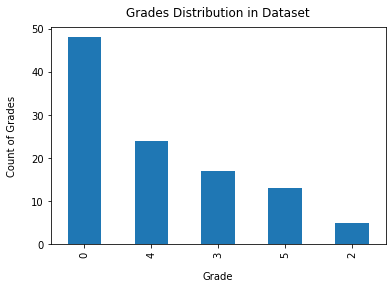

In [ ]:
df.Grade.value_counts().sort_values(ascending=False).plot(kind='bar');
plt.xlabel("Grade", labelpad=14)
plt.ylabel("Count of Grades", labelpad=14)
plt.title("Grades Distribution in Dataset", y=1.02);


In [5]:
data_subset = df[['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 
                  'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 
                  'Week6_Quiz3', 'Week6_Stat1', 'Grade']]
print(data_subset)

     Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  Week7_MP3  \
0           5.00       15.0        5.0      16.09       5.00      21.88   
1           3.33       15.0        5.0      17.83       5.00      22.27   
2           1.67       13.0        5.0      15.22       5.00      27.05   
3           2.50       14.0        5.0      10.00       5.00      31.02   
4           0.00       15.0        5.0      12.17       4.93      15.91   
..           ...        ...        ...        ...        ...        ...   
102         0.00        0.0        0.0       0.00       0.00       0.00   
103         0.00        0.0        0.0       0.00       0.00       0.00   
104         0.00        0.0        0.0       0.00       0.00       0.00   
105         0.00        0.0        0.0       0.00       0.00       0.00   
106         0.00        0.0        0.0       0.00       0.00       0.00   

     Week7_PR3  Week4_Quiz2  Week6_Quiz3  Week6_Stat1  Grade  
0          5.0         5.00         

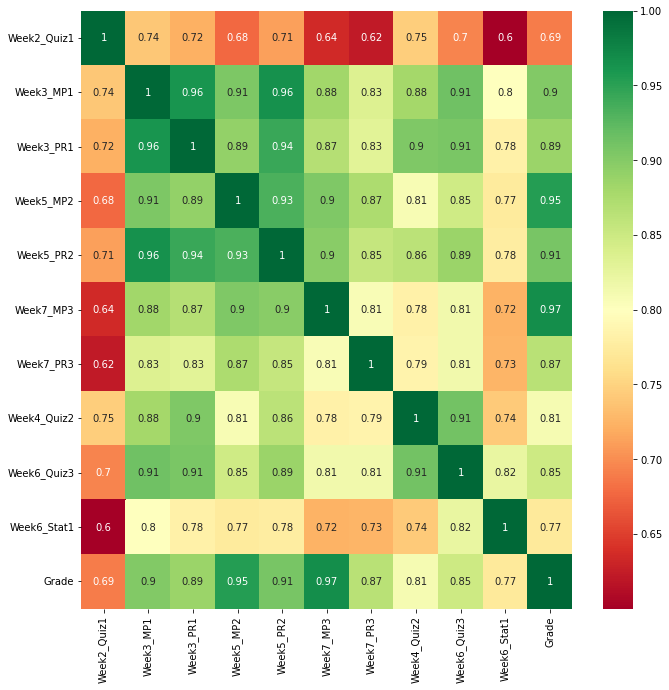

In [ ]:
corrmat = data_subset.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(11,11))
#plot heat map
g=sns.heatmap(data_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Mini Project 1 and Grade has a strong positive correlation
Mini Project 2 and Grade has a strong positive correlation
Mini Project 3 and Grade has a strong positive correlation

As three mini projects comprise 70% of the total score so they are the most three important features. and they have highest weightage as well.


In [6]:
X = data_subset.iloc[: , :-1]  # Features
y=data_subset['Grade']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED) # 70% training and 30% test

In [7]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=75, random_state=SEED)

#Train the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [8]:
# Show features importance score
pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
Week7_MP3,0.263487
Week5_MP2,0.244312
Week5_PR2,0.114060
Week3_MP1,0.091930
Week4_Quiz2,0.068714
Week6_Stat1,0.057715
Week3_PR1,0.046167
Week7_PR3,0.045382
Week6_Quiz3,0.035170
Week2_Quiz1,0.033063


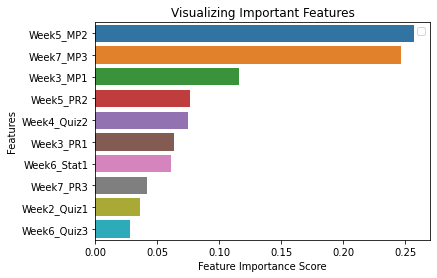

In [ ]:
#visualy plot barchart for feature importance score
%matplotlib inline
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [9]:
#Calculate Model accurcay by calling score method
print("Accurcary on Test Dataset (RF): " + str(metrics.accuracy_score(y_test, y_pred)))

Accurcary on Test Dataset (RF): 0.8181818181818182


In [16]:
#This step is not necessary to run because it only reinforce the choice of 75 estimators in previous step
#where random forest is initialized.
param_grid = {
    'n_estimators': [75, 85, 95, 105],
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=SEED) , param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(X_train,y_train)
y_pred=grid_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,


In [ ]:
grid_search.best_params_

{'n_estimators': 75}

In [17]:
# Model Accuracy : Random Forest
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.8181818181818182


In [11]:
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

pred_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(pred_df)

     y_Actual  y_Predicted
76          4            4
10          0            0
4           2            3
99          0            0
70          4            4
66          4            3
30          3            3
45          4            4
94          0            0
11          0            0
78          0            0
47          4            4
0           4            4
79          0            0
18          0            0
105         0            0
55          5            5
77          0            0
65          0            0
42          3            3
12          5            5
36          5            3
67          3            3
26          2            3
22          4            3
31          5            5
56          2            3
96          0            0
15          5            5
44          4            4
89          0            0
88          0            0
9           3            3


In [12]:
confusion_matrix = pd.crosstab(pred_df['y_Actual'], pred_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0  3  4  5
Actual                
0          13  0  0  0
2           0  3  0  0
3           0  4  0  0
4           0  2  6  0
5           0  1  0  4


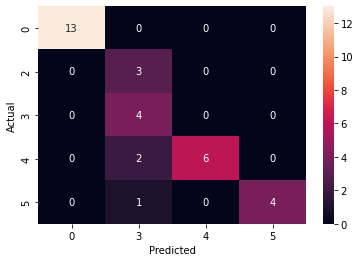

In [13]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [14]:
print(classification_report(pred_df['y_Actual'], pred_df['y_Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           2       0.00      0.00      0.00         3
           3       0.40      1.00      0.57         4
           4       1.00      0.75      0.86         8
           5       1.00      0.80      0.89         5

    accuracy                           0.82        33
   macro avg       0.68      0.71      0.66        33
weighted avg       0.84      0.82      0.81        33



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
knn = KNeighborsClassifier(n_neighbors=1) #k=1
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy of kNN with k=1", metrics.accuracy_score(y_test, y_pred))

Accuracy of kNN with k=1 0.7878787878787878


In [58]:
#This step is not necessary to run because it only reinforce the choice of k=1 in previous step
#where random forest is initialized.

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1,5)}, cv=5)
knn_grid.fit(X_train, y_train)
y_pred = knn_grid.predict(X_test)
print("Accuracy of kNN with k=1", metrics.accuracy_score(y_test, y_pred))

Accuracy of kNN with k=1 0.7878787878787878


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
knn_grid.best_params_

{'n_neighbors': 1}

In [ ]:
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

pred_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(pred_df)

     y_Actual  y_Predicted
76          4            4
10          0            0
4           2            3
99          0            0
70          4            4
66          4            5
30          3            4
45          4            4
94          0            0
11          0            0
78          0            0
47          4            5
0           4            4
79          0            0
18          0            0
105         0            0
55          5            5
77          0            0
65          0            0
42          3            2
12          5            4
36          5            5
67          3            3
26          2            3
22          4            3
31          5            5
56          2            3
96          0            0
15          5            4
44          4            4
89          0            0
88          0            0
9           3            3


In [ ]:
confusion_matrix = pd.crosstab(pred_df['y_Actual'], pred_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0  2  3  4  5
Actual                   
0          13  0  0  0  0
2           0  0  3  0  0
3           0  1  2  1  0
4           0  0  1  5  2
5           0  0  0  2  3


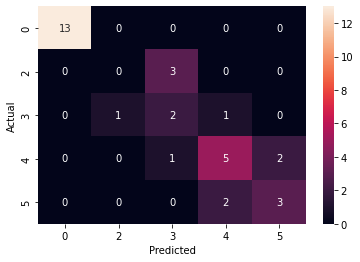

In [ ]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
print(classification_report(pred_df['y_Actual'], pred_df['y_Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           2       0.00      0.00      0.00         3
           3       0.33      0.50      0.40         4
           4       0.62      0.62      0.62         8
           5       0.60      0.60      0.60         5

    accuracy                           0.70        33
   macro avg       0.51      0.55      0.53        33
weighted avg       0.68      0.70      0.68        33

